In [4]:
pip install pycaret[full]

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.2.tar.gz (165 kB)
  Preparing metadata (setup.py) ... done
  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached xxhash-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached matplotlib-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
  Using cached schemdraw-0.15-py3-none-any.whl.metadata (2.2 kB)
  Usin

In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
from google.colab import files
uploaded = files.upload()


Saving abalone.data to abalone.data


In [12]:
# Display the first 100 rows as a table
from IPython.display import display

abalone_data = pd.read_csv('abalone.data', header=None)
display(abalone_data.head(100))


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


In [19]:
import pandas as pd

# Load the dataset (adjust path if needed)
dataset_path = '/content/abalone.data'
column_names = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"
]
abalone_data = pd.read_csv(dataset_path, header=None, names=column_names)

# Create the target column 'age' as Rings + 1.5
abalone_data['age'] = abalone_data['Rings'] + 1.5

# Drop the 'Rings' column since 'age' is now the target
abalone_data = abalone_data.drop(columns=['Rings'])

# Check the first few rows to verify the changes
abalone_data.head(10)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


# Setup

In [20]:
from pycaret.regression import *

# Set up the regression environment with 'age' as the target and all other columns as features
s = setup(data=abalone_data, target='age', session_id=123)

,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [21]:
from pycaret.regression import RegressionExperiment

# Initialize the RegressionExperiment class
exp = RegressionExperiment()

# Check the type of the instance
print(type(exp))  # This will show <class 'pycaret.regression.RegressionExperiment'>


<class 'pycaret.regression.oop.RegressionExperiment'>


In [22]:
# Run the setup method on the 'exp' instance
exp.setup(data=abalone_data, target='age', session_id=123)


,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


# Compare Models

In [23]:
best_model = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5168,4.5715,2.1350,0.5594,0.1517,0.1284,3.3780
gbr,Gradient Boosting Regressor,1.5183,4.6245,2.1480,0.5547,0.1524,0.1287,0.5110
rf,Random Forest Regressor,1.5419,4.7189,2.1701,0.5450,0.1546,0.1310,1.8620
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1551,0.1311,1.0570
et,Extra Trees Regressor,1.5553,4.7921,2.1876,0.5381,0.1557,0.1321,0.7050
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1602,0.1365,0.0680
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1630,0.1367,0.1390
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1586,0.1309,0.0760
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1634,0.1367,0.9130
huber,Huber Regressor,1.5654,5.0520,2.2461,0.5144,0.1599,0.1294,0.1180


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [24]:
model = exp.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4894,4.4045,2.0987,0.5748,0.1546,0.1320
1,1.5798,5.0135,2.2391,0.5139,0.1589,0.1347
2,1.5655,5.0925,2.2567,0.5165,0.1543,0.1272
3,1.5225,4.5533,2.1339,0.6233,0.1492,0.1245
4,1.3534,3.5842,1.8932,0.6654,0.1361,0.1144
5,1.4675,4.0013,2.0003,0.5938,0.1456,0.1274
6,1.5623,4.4231,2.1031,0.4773,0.1544,0.1327
7,1.5672,4.7706,2.1842,0.5834,0.1512,0.1306
8,1.5316,5.2554,2.2925,0.5058,0.1593,0.1310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Analyze Model

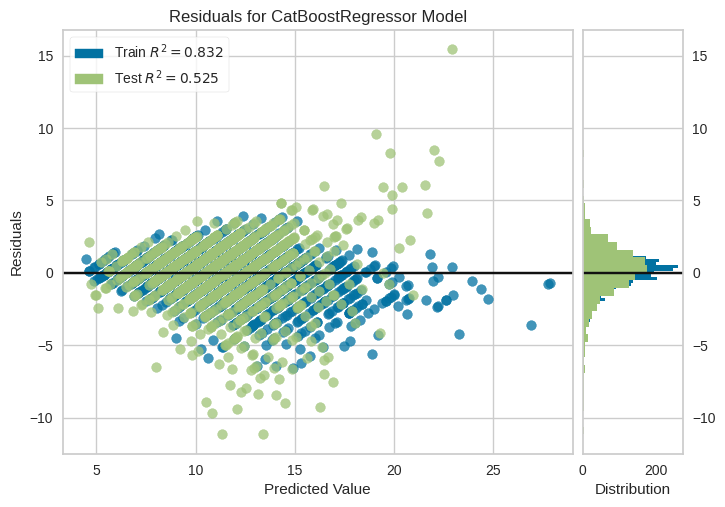

In [25]:
# Plot residuals for the best model
plot_model(best_model, plot='residuals')


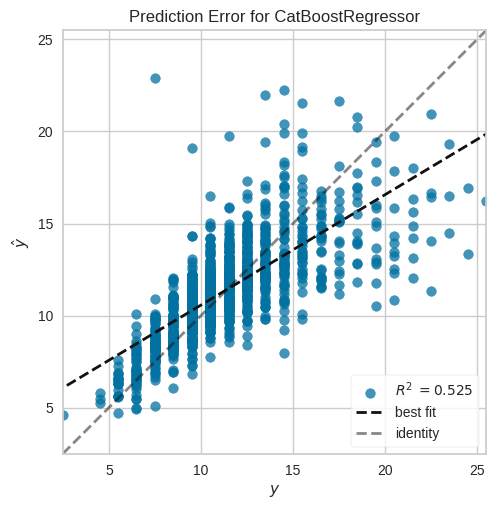

In [26]:
# Plot error for the best model
plot_model(best_model, plot='error')


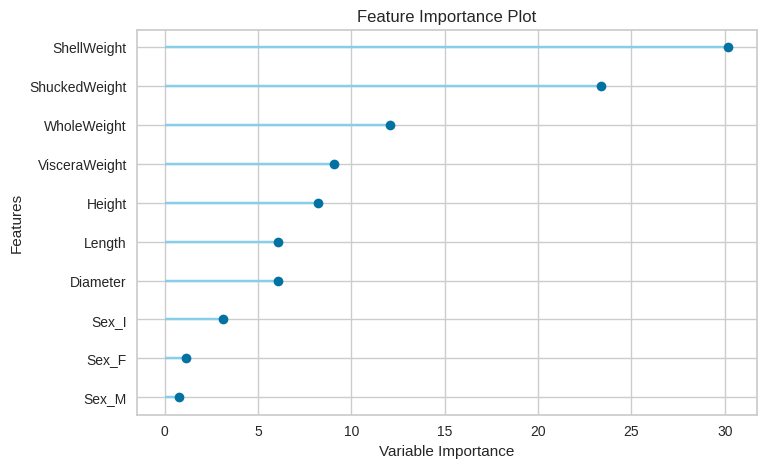

In [27]:
# Plot feature importance for the best model
plot_model(best_model, plot='feature')


In [28]:
# Evaluate the best model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Prediction

In [29]:
# Predict on the test set (holdout set)
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5244,4.8480,2.2018,0.5245,0.1559,0.1300


In [30]:
# Show the first few rows of the predictions
holdout_pred.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,age,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,6.5,6.548807
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,11.5,10.844533
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,10.5,10.265838
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,10.5,14.844065
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,15.5,13.510997


In [31]:
# Copy the dataset and drop the target variable ('age' in this case)
new_data = abalone_data.copy()
new_data.drop('age', axis=1, inplace=True)

# Show the first few rows of the new data
new_data.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [32]:
# Predict on the new data
predictions = predict_model(best_model, data=new_data)

# Show the first few rows of the predictions
predictions.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,prediction_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,11.352465
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.386630
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,12.178084
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.263446
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.953878


# Save Model

In [33]:
# Save the trained model pipeline
save_model(best_model, 'my_first_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor

In [34]:
# Load the saved model pipeline
loaded_best_pipeline = load_model('my_first_pipeline')

# Display the loaded pipeline details
loaded_best_pipeline


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7bcdfdfca740>)])

# Detailed function-by-function overview

# Setup


In [35]:
# Initialize the experiment with the target variable and other settings
s = setup(abalone_data, target = 'age', session_id = 123)


,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [36]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [37]:
# Access the transformed training data
get_config('X_train_transformed')


,Sex_I,Sex_M,Sex_F,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
112,1.0,0.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,1.0,0.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,1.0,0.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,0.0,0.0,1.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,1.0,0.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,1.0,0.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,1.0,0.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,1.0,0.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,0.0,0.0,1.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [38]:
# Check the current seed value
print("The current seed is: {}".format(get_config('seed')))

# Change the seed value to a new value
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))


The current seed is: 123
The new seed is: 786


In [39]:
# Initialize the setup with normalization enabled
s = setup(abalone_data, target = 'age', session_id = 123,
          normalize = True, normalize_method = 'minmax')


,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


<Axes: >

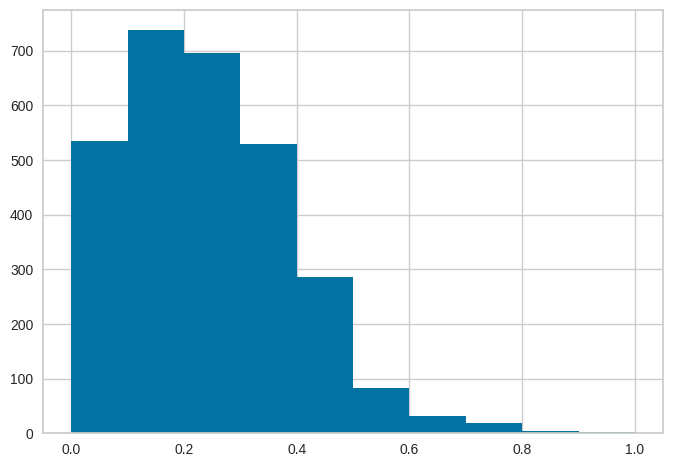

In [40]:
# Check the histogram of the transformed training data
get_config('X_train_transformed')['ShuckedWeight'].hist()

<Axes: >

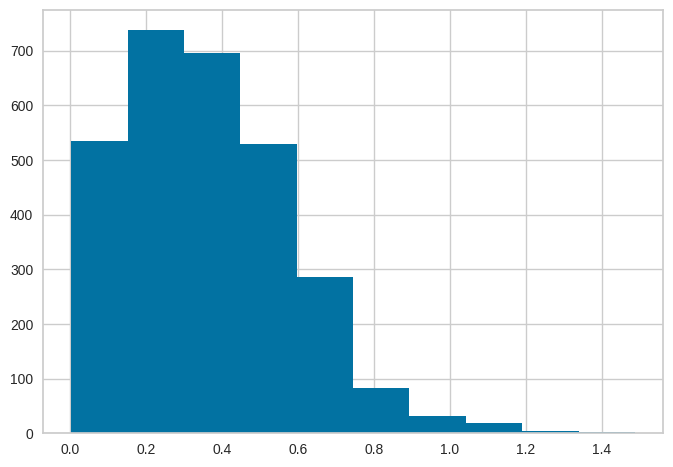

In [41]:
get_config('X_train')['ShuckedWeight'].hist()

# Compare Models

In [42]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5172,4.5801,2.1369,0.5586,0.1517,0.1284,3.1950
gbr,Gradient Boosting Regressor,1.5186,4.6245,2.1480,0.5547,0.1524,0.1287,0.4770
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.5880
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,0.8800
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,1.3160
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1627,0.1367,0.1390
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1634,0.1367,0.0780
huber,Huber Regressor,1.5654,5.0521,2.2461,0.5144,0.1599,0.1294,0.1230
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1607,0.1373,0.0710
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.1970


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [43]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [44]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5172,4.5801,2.1369,0.5586,0.1517,0.1284,3.1790
gbr,Gradient Boosting Regressor,1.5186,4.6245,2.1480,0.5547,0.1524,0.1287,0.7590
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.6420
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,1.4190
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.7190
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.3470
dt,Decision Tree Regressor,2.0598,8.8865,2.9777,0.1424,0.2097,0.1735,0.0920


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [45]:
compare_tree_models

In [46]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5172,4.5801,2.1369,0.5586,0.1517,0.1284,3.179
gbr,Gradient Boosting Regressor,1.5186,4.6245,2.1480,0.5547,0.1524,0.1287,0.759
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.642
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,1.419
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.719
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.347
dt,Decision Tree Regressor,2.0598,8.8865,2.9777,0.1424,0.2097,0.1735,0.092


In [47]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5172,4.5801,2.1369,0.5586,0.1517,0.1284,3.0210
gbr,Gradient Boosting Regressor,1.5186,4.6245,2.1480,0.5547,0.1524,0.1287,0.4760
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.6270
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,1.8220
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.8710
huber,Huber Regressor,1.5654,5.0521,2.2461,0.5144,0.1599,0.1294,0.1220
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1618,0.1330,0.0830
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1627,0.1367,0.1380
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1634,0.1367,0.0850
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.1940


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [48]:
# list of top 3 models by MAE
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

# Create Model


In [49]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [50]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1644,0.1414
1,1.6427,6.2469,2.4994,0.3943,0.1999,0.1437
2,1.6473,5.5216,2.3498,0.4758,0.1614,0.1362
3,1.5899,4.7723,2.1846,0.6052,0.1540,0.1321
4,1.4977,4.4391,2.1069,0.5856,0.1490,0.1251
5,1.5223,4.5549,2.1342,0.5376,0.1560,0.1316
6,1.6191,4.5836,2.1409,0.4583,0.1604,0.1395
7,1.6911,5.3691,2.3171,0.5311,0.1647,0.1406
8,1.5552,4.9599,2.2271,0.5336,0.1611,0.1378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1644,0.1414
1,1.6427,6.2469,2.4994,0.3943,0.1999,0.1437
2,1.6473,5.5216,2.3498,0.4758,0.1614,0.1362
3,1.5899,4.7723,2.1846,0.6052,0.1540,0.1321
4,1.4977,4.4391,2.1069,0.5856,0.1490,0.1251
5,1.5223,4.5549,2.1342,0.5376,0.1560,0.1316
6,1.6191,4.5836,2.1409,0.4583,0.1604,0.1395
7,1.6911,5.3691,2.3171,0.5311,0.1647,0.1406
8,1.5552,4.9599,2.2271,0.5336,0.1611,0.1378


In [52]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6338,5.4525,2.3351,0.4847,0.1693,0.1392
1,1.5420,4.5741,2.1387,0.5680,0.1543,0.1312
2,1.6163,4.9095,2.2157,0.5209,0.1624,0.1389
Mean,1.5974,4.9787,2.2298,0.5246,0.1620,0.1365
Std,0.0398,0.3619,0.0808,0.0341,0.0061,0.0037


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6112,4.9952,2.2350,0.5178,0.1644,0.1417
1,1.6436,6.2401,2.4980,0.3950,0.1990,0.1439
2,1.6461,5.5187,2.3492,0.4761,0.1613,0.1362
3,1.5893,4.7689,2.1838,0.6054,0.1540,0.1321
4,1.4943,4.4272,2.1041,0.5867,0.1488,0.1249
5,1.5237,4.5586,2.1351,0.5372,0.1561,0.1318
6,1.6183,4.5787,2.1398,0.4589,0.1604,0.1395
7,1.6917,5.3627,2.3157,0.5317,0.1649,0.1411
8,1.5502,4.9402,2.2227,0.5354,0.1609,0.1375


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [54]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

# Tune Model

In [55]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1024,9.4334,3.0714,0.0894,0.2198,0.1838
1,2.0000,8.5734,2.9280,0.1688,0.2054,0.1686
2,2.1843,10.5461,3.2475,-0.0012,0.2210,0.1789
3,2.0959,8.7603,2.9598,0.2752,0.2093,0.1739
4,1.9247,7.9452,2.8187,0.2583,0.2007,0.1613
5,1.9281,7.2500,2.6926,0.2640,0.1972,0.1675
6,2.1815,9.0308,3.0051,-0.0673,0.2101,0.1828
7,2.0377,8.9486,2.9914,0.2185,0.2045,0.1658
8,2.0445,8.9829,2.9971,0.1553,0.2087,0.1747


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1729,0.1371
1,1.6485,6.0648,2.4627,0.4120,0.1724,0.1354
2,1.6962,6.7918,2.6061,0.3552,0.1753,0.1296
3,1.7021,6.0976,2.4693,0.4955,0.1722,0.1334
4,1.5634,5.2800,2.2978,0.5071,0.1603,0.1248
5,1.3990,4.3536,2.0865,0.5580,0.1500,0.1171
6,1.5103,4.9144,2.2168,0.4192,0.1626,0.1251
7,1.6353,6.5796,2.5651,0.4254,0.1722,0.1262
8,1.5719,6.3185,2.5137,0.4058,0.1732,0.1297


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
dt

DecisionTreeRegressor(random_state=123)

In [58]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6985,6.4541,2.5405,0.3770,0.1830,0.1511
1,1.7145,5.7783,2.4038,0.4398,0.1701,0.1446
2,1.7512,6.5911,2.5673,0.3743,0.1756,0.1425
3,1.6811,5.3889,2.3214,0.5541,0.1643,0.1383
4,1.5337,4.7422,2.1777,0.5573,0.1538,0.1278
5,1.5666,5.0187,2.2402,0.4905,0.1588,0.1345
6,1.6789,5.4960,2.3444,0.3505,0.1670,0.1421
7,1.6469,5.4194,2.3280,0.5267,0.1577,0.1349
8,1.7033,6.7758,2.6030,0.3628,0.1784,0.1462


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [59]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1729,0.1371
1,1.6485,6.0648,2.4627,0.4120,0.1724,0.1354
2,1.6962,6.7918,2.6061,0.3552,0.1753,0.1296
3,1.7021,6.0976,2.4693,0.4955,0.1722,0.1334
4,1.5634,5.2800,2.2978,0.5071,0.1603,0.1248
5,1.3990,4.3536,2.0865,0.5580,0.1500,0.1171
6,1.5103,4.9144,2.2168,0.4192,0.1626,0.1251
7,1.6353,6.5796,2.5651,0.4254,0.1722,0.1262
8,1.5719,6.3185,2.5137,0.4058,0.1732,0.1297


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [60]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [61]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'WholeWeight',
                                                                          'ShuckedWeight',
                                                                          'VisceraWeight',
                                                                          'ShellWeight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['S...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

In [62]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6439,5.3968,2.3231,0.4790,0.1720,0.1445
1,1.6678,5.6784,2.3829,0.4495,0.1691,0.1416
2,1.7050,6.3672,2.5233,0.3955,0.1714,0.1378
3,1.7177,5.8729,2.4234,0.5141,0.1682,0.1388
4,1.5525,4.6644,2.1597,0.5646,0.1530,0.1301
5,1.5942,5.1951,2.2793,0.4726,0.1604,0.1374
6,1.5901,4.6771,2.1627,0.4472,0.1602,0.1354
7,1.6360,5.3299,2.3086,0.5345,0.1584,0.1341
8,1.6901,6.3625,2.5224,0.4017,0.1735,0.1444


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2923 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


# Ensemble Model

In [63]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6007,5.3464,2.3122,0.4839,0.1718,0.1441
1,1.6000,5.3427,2.3114,0.4820,0.1662,0.1385
2,1.6430,5.6844,2.3842,0.4603,0.1640,0.1340
3,1.6188,5.1442,2.2681,0.5744,0.1583,0.1319
4,1.5195,4.3822,2.0934,0.5909,0.1512,0.1281
5,1.5524,4.4251,2.1036,0.5508,0.1542,0.1350
6,1.6062,4.7079,2.1698,0.4436,0.1587,0.1371
7,1.6699,5.4538,2.3353,0.5237,0.1600,0.1379
8,1.6086,5.5331,2.3523,0.4797,0.1654,0.1397


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [64]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6280,6.1809,2.4861,0.4033,0.1811,0.1436
1,1.6007,5.6143,2.3695,0.4557,0.1692,0.1365
2,1.7031,6.3993,2.5297,0.3925,0.1735,0.1352
3,1.6027,5.5685,2.3598,0.5393,0.1654,0.1282
4,1.6301,5.5342,2.3525,0.4834,0.1705,0.1375
5,1.5274,4.6370,2.1534,0.5292,0.1577,0.1298
6,1.6644,5.4452,2.3335,0.3565,0.1687,0.1381
7,1.5445,5.0856,2.2551,0.5559,0.1577,0.1272
8,1.5445,5.9555,2.4404,0.4400,0.1675,0.1316


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

# Blend Models

In [65]:
# top 3 models based on mae
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

In [66]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4935,4.4799,2.1166,0.5675,0.1567,0.1330
1,1.5486,4.8672,2.2062,0.5281,0.1567,0.1329
2,1.5477,5.0452,2.2462,0.5210,0.1540,0.1260
3,1.5116,4.4078,2.0995,0.6353,0.1465,0.1232
4,1.3746,3.7668,1.9408,0.6484,0.1383,0.1155
5,1.4211,3.8326,1.9577,0.6109,0.1423,0.1237
6,1.5395,4.3133,2.0768,0.4902,0.1532,0.1311
7,1.5566,4.7410,2.1774,0.5860,0.1499,0.1287
8,1.5043,5.1474,2.2688,0.5159,0.1574,0.1295


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7bcdfe419870>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123))],
                n_jobs=-1)

# Stack Models

In [67]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4890,4.4719,2.1147,0.5683,0.1565,0.1326
1,1.5444,4.8562,2.2037,0.5292,0.1564,0.1323
2,1.5450,5.0384,2.2446,0.5217,0.1536,0.1255
3,1.5136,4.4533,2.1103,0.6315,0.1471,0.1232
4,1.3679,3.7280,1.9308,0.6520,0.1376,0.1151
5,1.4351,3.8724,1.9678,0.6069,0.1432,0.1248
6,1.5321,4.2903,2.0713,0.4930,0.1527,0.1303
7,1.5586,4.7338,2.1757,0.5866,0.1501,0.1292
8,1.5007,5.1376,2.2666,0.5169,0.1575,0.1293


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7bcdfe49b5b0>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

# Plot Model

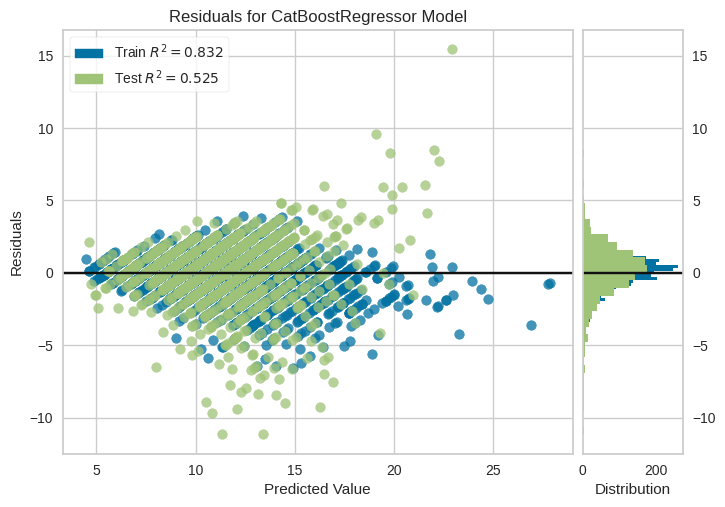

In [68]:
# plot residuals
plot_model(best, plot = 'residuals')

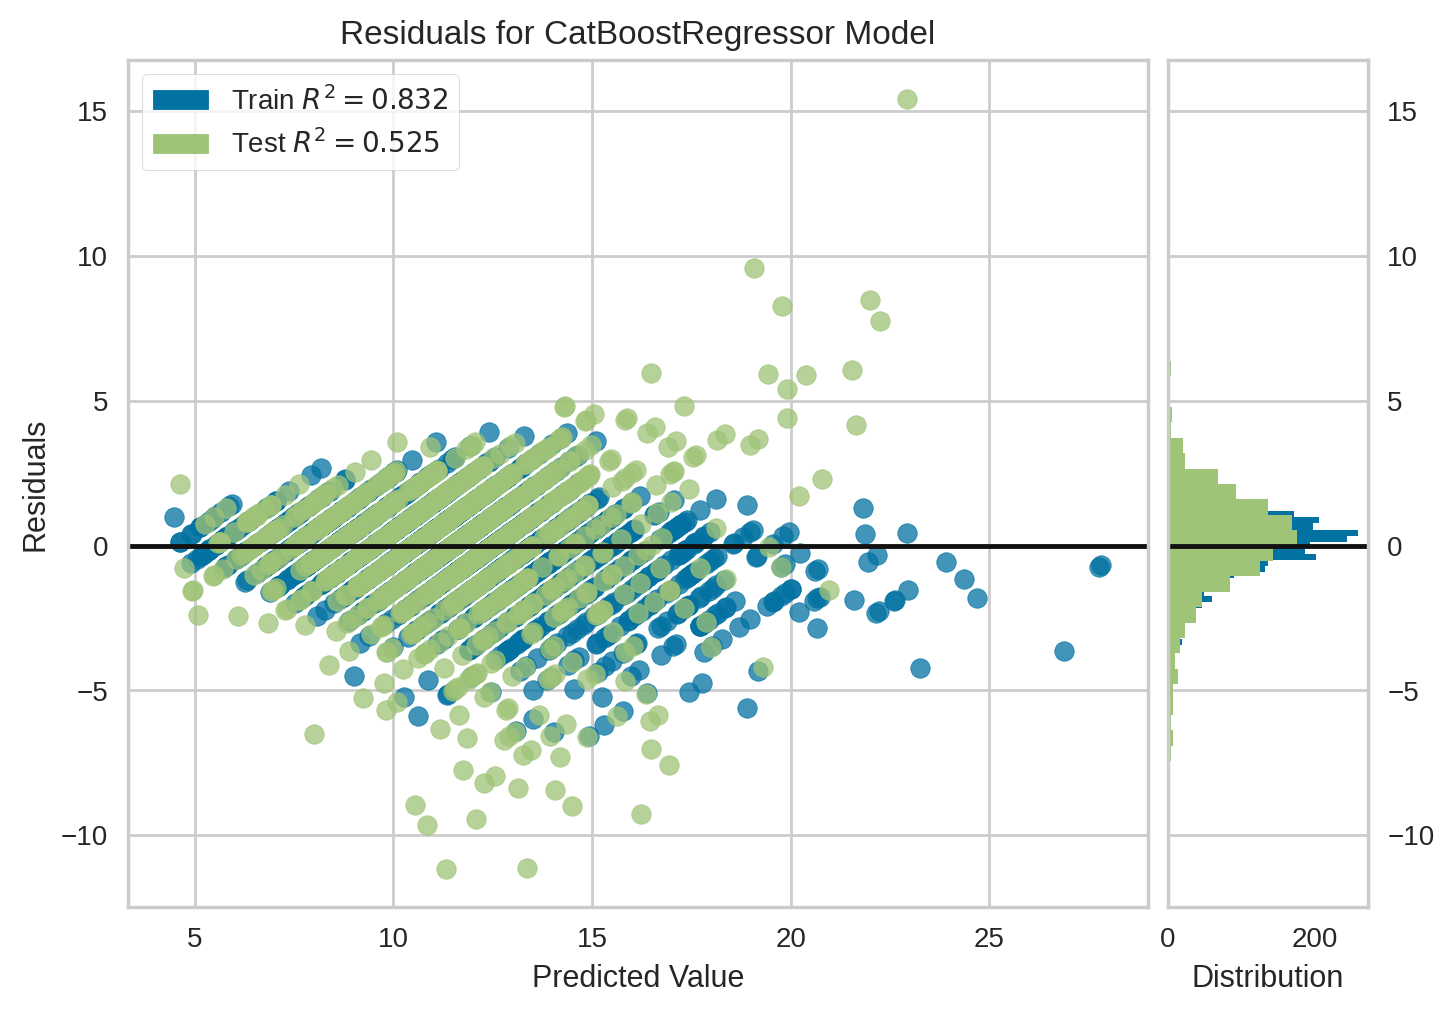

In [69]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [70]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

# Interpret Model

In [71]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5663,4.7922,2.1891,0.5374,0.1619,0.1391
1,1.5784,4.9471,2.2242,0.5204,0.1585,0.1349
2,1.6313,5.3880,2.3212,0.4885,0.1588,0.1320
3,1.6187,4.9732,2.2301,0.5885,0.1556,0.1315
4,1.4582,4.1978,2.0489,0.6081,0.1451,0.1219
5,1.4168,3.8101,1.9519,0.6132,0.1428,0.1234
6,1.5823,4.7140,2.1712,0.4429,0.1588,0.1343
7,1.5982,5.0782,2.2535,0.5565,0.1567,0.1335
8,1.5047,5.2147,2.2836,0.5096,0.1599,0.1298


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

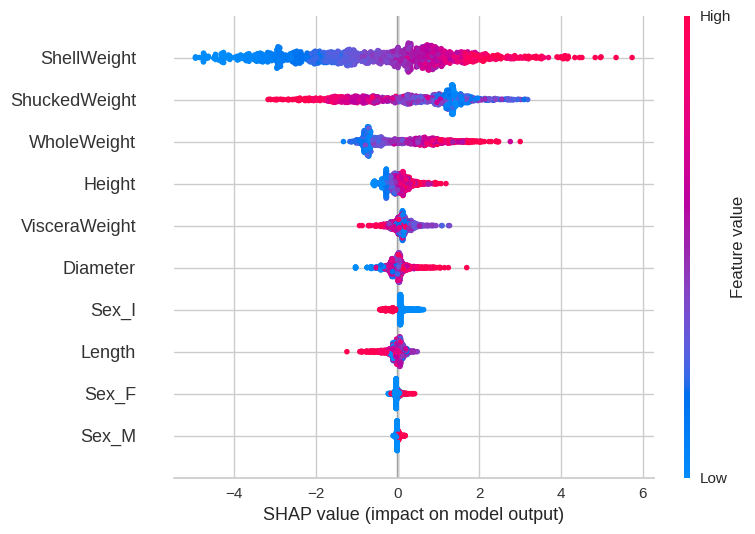

In [72]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [73]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

# Get Leaderboard

In [74]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/66 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.5997,5.0260,2.2390,0.5159,0.1634,0.1367
1,Lasso Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3643,10.4823,3.2344,-0.0037,0.2503,0.2206
2,Ridge Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.6122,5.1642,2.2688,0.5034,0.1607,0.1373
3,Elastic Net,"(TransformerWrapper(include=['Length', 'Diamet...",2.3266,10.1932,3.1893,0.0242,0.2463,0.2166
4,Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.0611,11.1576,2.9572,-0.0874,0.2136,0.1801
...,...,...,...,...,...,...,...,...
60,Decision Tree Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.6069,5.1304,2.2629,0.5062,0.1618,0.1368
61,Decision Tree Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.6031,5.5671,2.3571,0.4632,0.1675,0.1339
62,Voting Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.4998,4.5123,2.1216,0.5652,0.1506,0.1271


In [75]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 Trans...
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ['trained_model',
                 StackingRegressor(cv=5,
                                   estimators=[('CatBoost Regressor',
                                                <catboost.core.CatBoostRegressor object at 0x7bcd4aaeb6a0>),
                                               ('Gradient Boosting Regressor',
                                                GradientBoostingRegressor(random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1)]])

# AutoML

In [76]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7bcd4aa618d0>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

# Dashboard

In [77]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Create App

In [78]:
# create gradio app
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1752577864ce940623.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Create API

In [79]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [84]:
!python my_first_api.py

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/my_first_api.py", line 16, in <module>
    input_model = create_model("my_first_api_input", **{'Sex': 'I', 'Length': 0.4350000023841858, 'Diameter': 0.3199999928474426, 'Height': 0.07999999821186066, 'WholeWeight': 0.33250001072883606, 'ShuckedWeight': 0.148499995470047, 'VisceraWeight': 0.06350000202655792, 'ShellWeight': 0.10499999672174454})
  File "/usr/local/lib/python3.10/dist-packages/pydantic/main.py", line 1600, in create_model
    return meta(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 115, in __new__
    private_attributes = inspect_namespace(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 428, in inspect_namespace
    raise PydanticUserError(
pydantic.errors.PydanticUserError: A non-annotated attribute was detected: `Sex = 'I'`. All model fields require a type annotat

# Create Docker

In [81]:
final_best = finalize_model(best)

In [82]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7bcd49af24a0>)])

# Convert Model

In [83]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[9] <= 0.18637724965810776) {
            if (input[9] <= 0.09156686440110207) {
                if (input[9] <= 0.03617764450609684) {
                    if (input[8] <= 0.012837393209338188) {
                        if (input[7] <= 0.004207337740808725) {
                            if (input[7] <= 0.001514641393441707) {
                                if (input[9] <= 0.001497005927376449) {
                                    var0 = 4.5;
                                } else {
                                    var0 = 3.5;
                                }
                            } else {
                                if (input[5] <= 0.02433628309518099) {
                                    var0 = 5.5;
                                } else {
                                    if (input[7] <= 0.0018512284732423723) {
                                        var0 = 

# Deploy Model

In [98]:
# add AWS credential file to colab : Acceess ID and Secret ID
from google.colab import files

# Upload the credentials file
uploaded = files.upload()


Saving credentials to credentials


In [102]:
deploy_model(
    best,
    model_name='my_first_platform_on_aws',
    platform='aws',
    authentication={'bucket': 'pycaret-testai'}
)


Model Successfully Deployed on AWS S3


In [103]:
# Check model deployed on AWS S3
import boto3

s3 = boto3.client('s3')
response = s3.list_objects_v2(Bucket='pycaret-testai')
for obj in response.get('Contents', []):
    print(obj['Key'])


my_first_platform_on_aws.pkl


In [104]:
# load model from AWS
loaded_from_aws = load_model(
    model_name='my_first_platform_on_aws',
    platform='aws',
    authentication={'bucket': 'pycaret-testai'}
)

# Print the loaded model
print(loaded_from_aws)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', Tran

# Save / Load Model

In [105]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
     

In [106]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7bcd43011ae0>)])

# Save / Load Experiment

In [107]:
# save experiment
save_experiment('my_experiment')

In [108]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=abalone_data)

,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True
